# EXPLORATION 

In [1]:
import pandas as pd
import numpy as np
import os
from env import hostname, user, password

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import wrangle as w
import explore as e


import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

### <Span style = "color:green"> 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.



In [2]:
df = w.get_zillow_data()
df.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2085748.0,3.286619,0.897277,1.00,3.00,3.00,4.0000,8.00
bathrooms,2085748.0,2.196463,0.892988,0.50,2.00,2.00,3.0000,9.00
sqft,2085748.0,1808.081225,1041.651774,102.00,1254.00,1611.00,2168.0000,952576.00
home_value,2085748.0,400925.020997,315870.742125,22.00,187412.00,323272.00,518044.0000,1999995.00
year_built,2085748.0,1960.647500,21.876580,1801.00,1949.00,1958.00,1975.0000,2016.00
sale_tax,2085748.0,4937.008174,3666.808397,16.48,2522.05,4052.64,6232.6325,100379.34
fips,2085748.0,6048.295766,20.360343,6037.00,6037.00,6037.00,6059.0000,6111.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085748 entries, 0 to 2085747
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   home_value  float64
 4   year_built  float64
 5   sale_tax    float64
 6   fips        float64
dtypes: float64(7)
memory usage: 111.4 MB


In [5]:
df.shape

(2085748, 7)

In [6]:
df = w.prep_zillow(df)
df.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085748 entries, 0 to 2085747
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   home_value  float64
 4   year_built  float64
 5   sale_tax    float64
 6   fips        float64
dtypes: float64(7)
memory usage: 127.3 MB


In [8]:
df = w.dtype_zillow(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085748 entries, 0 to 2085747
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   int64  
 2   sqft        int64  
 3   home_value  float64
 4   year_built  object 
 5   sale_tax    float64
 6   fips        object 
dtypes: float64(2), int64(3), object(2)
memory usage: 127.3+ MB


In [9]:
df.shape

(2085748, 7)

In [10]:
df.isnull().sum()


bedrooms      0
bathrooms     0
sqft          0
home_value    0
year_built    0
sale_tax      0
fips          0
dtype: int64

####  <Span style = "color:green">Stratify on fips by County

In [11]:
# Replace FIPS codes with county names
df['fips'] = df['fips'].replace(6037, 'Los_Angelos')
df['fips'] = df['fips'].replace(6059, 'Orange_County')
df['fips'] = df['fips'].replace(6111, 'Ventura_County')

### <Span style = "color:green"> 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [12]:
train, validate, test = w.split_zillow(df)



In [13]:
print(f'Train shape: {train.shape}')
print(f'Validate shape: {validate.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1251448, 7)
Validate shape: (417150, 7)
Test shape: (417150, 7)


In [14]:
train.shape

(1251448, 7)

In [15]:
train.fips.value_counts()

6037    834615
6059    321339
6111     95494
Name: fips, dtype: int64

In [16]:
train.bathrooms.value_counts()

2    646164
3    265102
1    264436
4     55087
5     15536
6      3874
7       986
8       210
9        45
0         8
Name: bathrooms, dtype: int64

In [17]:
train.sqft.value_counts()

1200    3066
1080    2582
1120    2537
1400    2281
1440    2241
        ... 
6216       1
6269       1
461        1
144        1
7381       1
Name: sqft, Length: 7007, dtype: int64

### <Span style = "color:green"> 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
def plot_variable_pairs(df):
    # Select a random sample from the train dataset
    df_sample = df.sample(n=1000)
    sns.pairplot(df_sample, hue="fips", markers=None)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


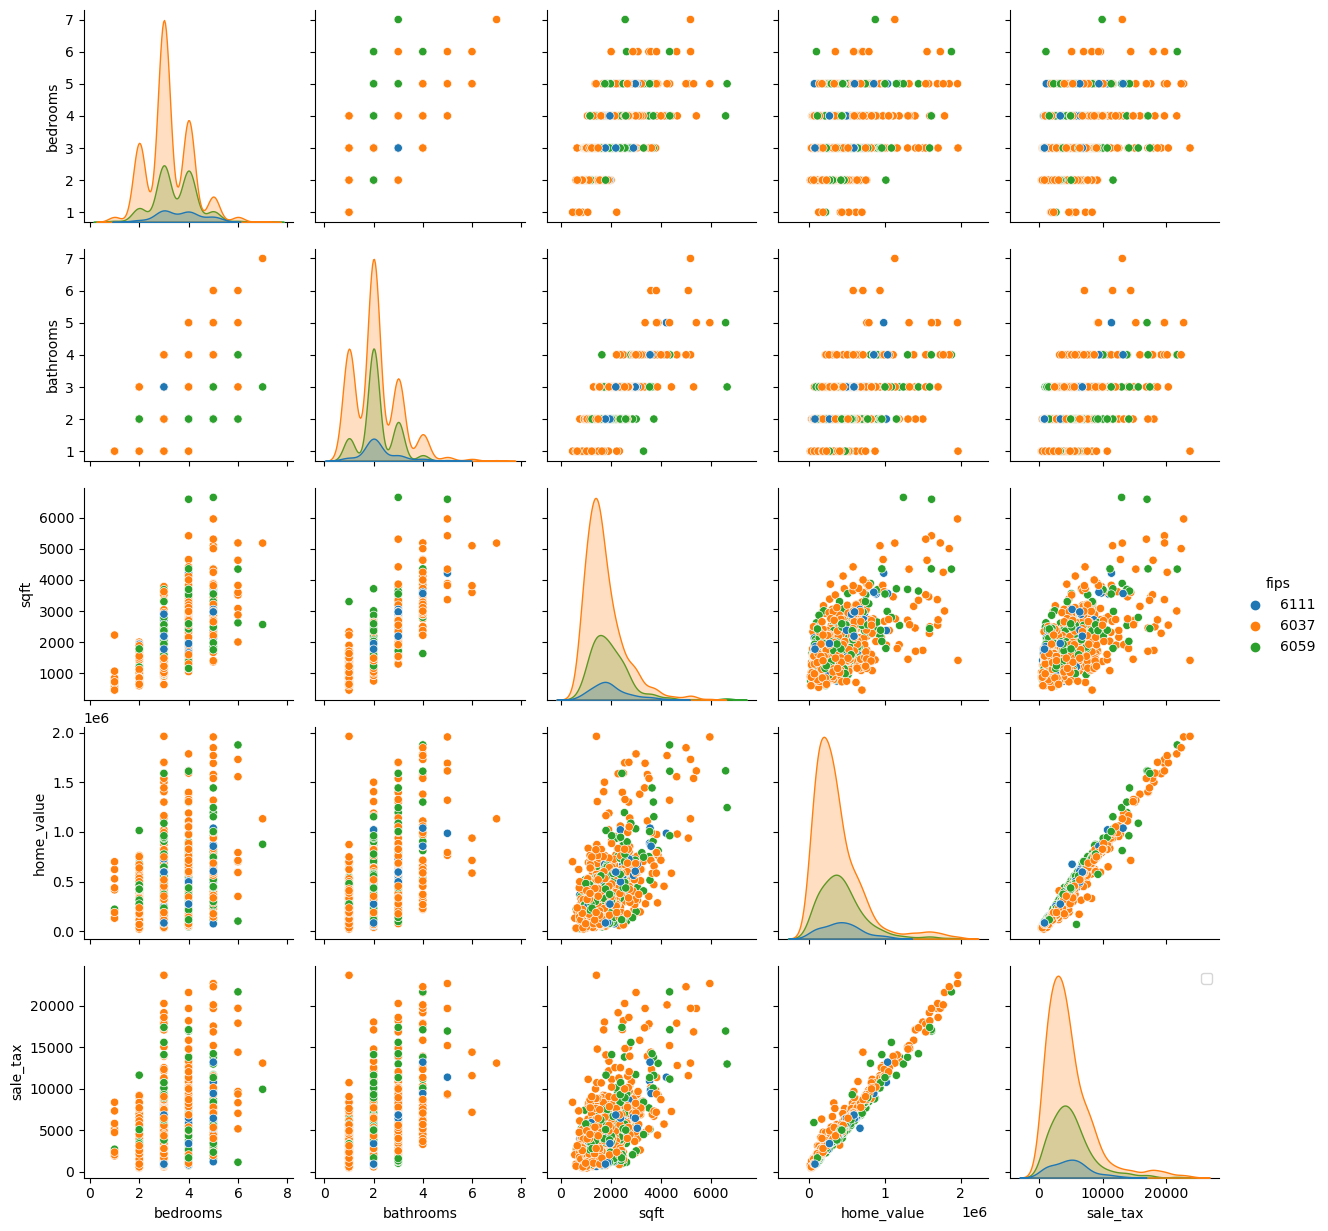

In [19]:
plot_variable_pairs(train)

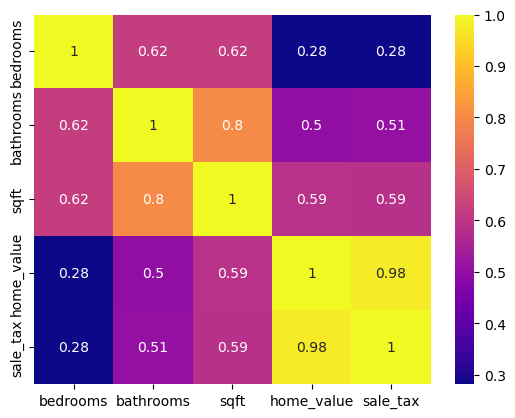

In [20]:
sns.heatmap(train.corr(), cmap='plasma', annot=True,)
plt.show()

### <Span style = "color:green"> 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

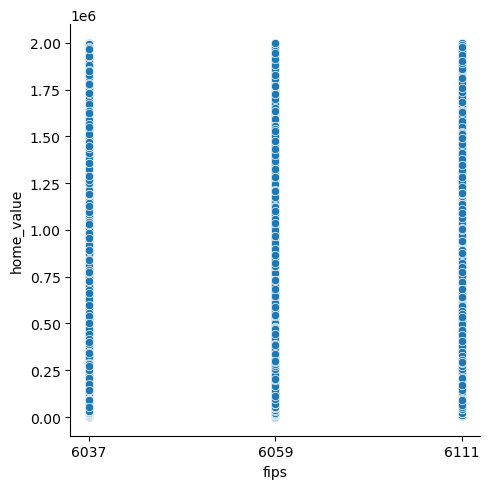

In [24]:
sns.relplot(x=train.fips , y=train.home_value)

In [25]:
def plot_categorical_and_continuous_vars(df, categorical_feature, continuous_feature):
    # Select a random sample from the train dataset
    df_sample = df.sample(n=1000)
#     # Selected features and hue
#     categorical_feature = ["bedrooms", "bathrooms","sqft"]
#     continuous_feature = ["home_value","sale_tax"]
#     hue = "fips"
#     fig, axs = plt.subplots(1,3, figsize=(18,8))
    # Plot 1: Box plot
    plt.figure(figsize=(18, 8))dd
    sns.boxplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Box Plot")
    plt.show()
    
    # Plot 2: Violin plot
    plt.figure(figsize=(18, 8))
    sns.violinplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue, split=True)
    plt.title("Violin Plot")
    plt.show()
    
    # Plot 3: Swarm plot
    plt.figure(figsize=(18, 8))
    sns.swarmplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Swarm Plot")
    plt.show()
    
#     df = df.sample(n=1000)
    
#     fig, axs = plt.subplots(1,3, figsize=(18,8))
    
#     sns.stripplot(ax=axs[0], x=cat_var_col, y=con_var_col, data=df)
#     axs[0].set_title('stripplot')
    
#     sns.boxplot(ax=axs[1], x=cat_var_col, y=con_var_col, data=df)
#     axs[1].set_title('boxplot')
    
#     sns.swarmplot(ax=axs[2], x=cat_var_col, y=con_var_col, data=df, s=1)
#     axs[2].set_title('swarmplot')
    

SyntaxError: invalid syntax (408935355.py, line 10)

TypeError: lmplot() got an unexpected keyword argument 'feature'

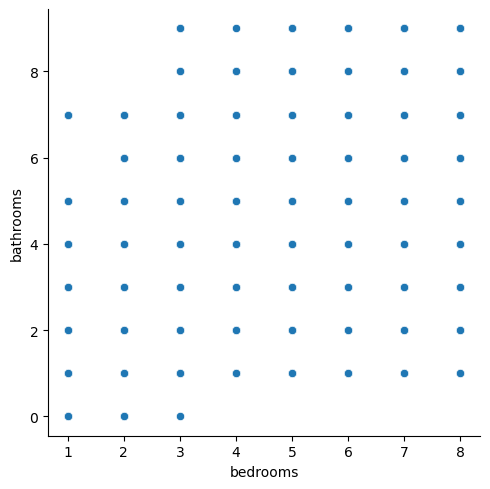

In [26]:
sns.relplot(x=train.bedrooms , y=train.bathrooms, data=train)
features = [ "fips"]
for feature in features:
    sns.lmplot(data=train.sample(1000), hue = 'fips', feature= 'fips', y='sale_tax', x = feature, line_kws={'color'})

In [27]:
def plot_categorical_and_continuous_vars(df, categorical_feature, continuous_feature):
    # Select a random sample from the train dataset
    df_sample = df.sample(n=1000)
    # Selected features and hue
    categorical_feature = ["bedrooms", "bathrooms","sqft"]
    continuous_feature = ["home_value","sale_tax"]
    hue = "fips"
#     fig, axs = plt.subplots(1,3, figsize=(18,8))
    # Plot 1: Box plot
    plt.figure(figsize=(18, 8))
    sns.boxplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Box Plot")
    plt.show()
    
    # Plot 2: Violin plot
    plt.figure(figsize=(18, 8))
    sns.violinplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue, split=True)
    plt.title("Violin Plot")
    plt.show()
    
    # Plot 3: Swarm plot
    plt.figure(figsize=(18, 8))
    sns.swarmplot(data=df, x=categorical_feature, y=continuous_feature, hue=hue)
    plt.title("Swarm Plot")
    plt.show()

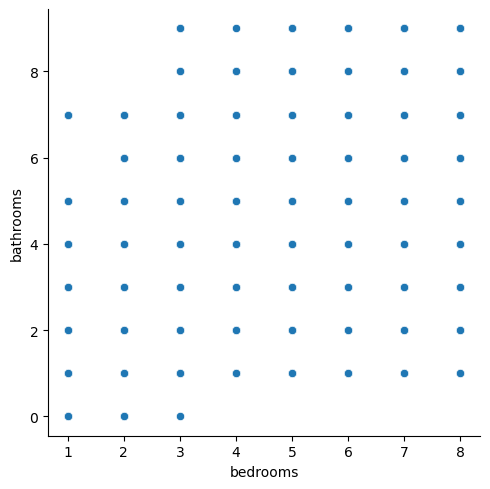

In [28]:
sns.relplot(x=train.bedrooms , y=train.bathrooms, data=train)

In [ ]:
sns.swarmplot(x=train.fips, y=train.sqft)

In [ ]:
sns.barplot(x=train.fips, y=train.sqft)

The plot_categorical_and_continuous_vars function takes a DataFrame (Train), a categorical feature name, and a continuous feature name as inputs. It generates three plots (box plot, violin plot, and swarm plot) to visualize the relationship between the category



### <Span style = "color:green"> 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
def bath_bar():    
    train_sample = train.sample(n=3017)
    # Visualizing bathrooms by county
    bath = sns.countplot(data=train_sample, x='bathrooms', hue='county')
    
    # Access the legend object
    legend = bath.legend()
    bath.set_xlabel('Bathrooms')
    bath.set_ylabel('Tax Value')
    plt.title('Bathrooms vs Tax Value')
                          
     # Add count numbers on bars
    for p in bath.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        count = int(height)  # Get the count value
        offset = width * 0.02  # Adjust the offset percentage as needed
        bath.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
    plt.show()

### <Span style = "color:green"> 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### <Span style = "color:green"> 7. Come up with some initial hypotheses based on your goal of predicting property value.

Hypothesis 1 - Pearson R

alpha = .05
H0 = Number of Bathrooms has no relationship with of property tax value
Ha = Number of Bathrooms has a relationship with property tax value

    
Hypothesis 2 - Spearman R
alpha = .05
H0 = Square Feet has no correlation with property tax value
Ha = Square Feet is correlated to property tax value

    
    
Hypothesis 3 - Pearson R

alpha = .05
H0 = Number of Bedrooms has no relationship with property tax value
Ha = Number of Bedrooms has a relationship with on property tax value

    
Hypothesis 4 - Spearman R

alpha = .05
H0= Lot Size has no significant correlation with property tax value
Ha= Lot Size is correlated to property tax value

### <Span style = "color:green"> 8. Visualize all combinations of variables in some way.

In [ ]:
def plot_variable_pairs():
    train_sample = train.sample(n=3017)
    features = ['bedrooms', 'bathrooms', 'sqft', 'lot_size']
    for feature in features:
        sns.lmplot(x=feature, y="tax_value", data=train_sample, hue='county', line_kws={'color': 'red'})
        
plot_variable_pairs()


### <Span style = "color:green"> 9. Run the appropriate statistical tests where needed.

In [ ]:
#Bathrooms stat
from scipy.stats import pearsonr, spearmanr
def bath_stat(train, validate, test):
    alpha = 0.05
    train_r, train_p = pearsonr(train.bathrooms, train.tax_value)
    validate_r, validate_p = pearsonr(validate.bathrooms, validate.tax_value)
    test_r, test_p = pearsonr(test.bathrooms, test.tax_value)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
def sqft_stat(train, validate, test):
    alpha = 0.05
    train_r, train_p = spearmanr(train.sqft, train.tax_value)
    validate_r, validate_p = spearmanr(validate.sqft, validate.tax_value)
    test_r, test_p = spearmanr(test.sqft, test.tax_value)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print('test_r:', test_r)
    print('test_p:', test_p)
    print(f'The p-value is less than the alpha: {test_p < alpha}')
    if test_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        

### <Span style = "color:green"> 10. What independent variables are correlated with the dependent variable, home value?

In [ ]:
#bathrooms, sqft, bedrooms, lot_size

### <Span style = "color:green"> 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [ ]:
#bedrooms and bathrooms

### <Span style = "color:green"> 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

In [ ]:
# See exploratory.ipynb for more information

### <Span style = "color:green"> 13. Explore your dataset with any other visualizations you think will be helpful.